# DTSA 5509 Supervised Learning Final Project

# 1: Project Topic - Airbnb Rental Price Analysis
**GOAL:** This project focuses on analyzing a dataset related to Airbnb rental prices. The dataset contains valuable information about various Airbnb rentals and their corresponding rental prices. As this dataset includes labeled data (rental prices), it falls under the category of supervised learning problems. The goal of this project is to leverage this dataset to develop a supervised learning model that assists property owners in predicting the optimal listing price for their Airbnb rentals.



# 2: Data - Airbnb Prices in European Cities 
This Airbnb Prices in European Cities dataset is published on Kaggle - https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

This dataset contains tabulated data for 10 European cities stored in 20 .csv files. Each city has two .csv files, one for weekdays and one for weekends. Each .csv file has 20 columns of data, with a total of 51,707 rows combined from all 20 files. The dataset comprises 20 variables, listed as follows:
- realSum: The total price of accommodation for two people and two nights in EUR (Numeric)
- room_type (Entire home/apt / Private room / Shared room): The type of accommodation (Categorical)
- room_shared: Whether the room is shared or not (Boolean)
- room_private: Whether the room is private or not (Boolean)
- person_capacity: The maximum number of people that can stay in the room (Numeric)
- host_is_superhost: Whether the host is a superhost or not (Boolean)
- multi: Whether the listing belongs to hosts with 2-4 offers (Boolean)
- biz: Whether the the listing belongs to hosts with more than 4 offers (Boolean)
- cleanliness_rating: The cleanliness rating of the listing (Numeric)
- guest_satisfaction_overall: The overall guest satisfaction rating of the listing (Numeric)
- bedrooms: The number of bedrooms in the listing (Numeric)
- dist: The distance from the city center in km (Numeric)
- metro_dist: The distance from the nearest metro station in km (Numeric)
- attr_index: Attraction index of the listing location (Numeric)
- attr_index_norm: Normalized attraction index (0-100) (Numeric)
- rest_index: Restaurant index of the listing location (Numeric)
- attr_index_norm: Normalized restaurant index (0-100) (Numeric)
- lng: Longitude of the listing location (Numeric)
- lat: Latitude of the listing location (Numeric)

The total size of the entire dataset is 10.76 MB contained in the following 20 .csv files below.

- amsterdam_weekdays.csv
- amsterdam_weekends.csv
- athens_weekdays.csv
- athens_weekends.csv
- barcelona_weekdays.csv
- barcelona_weekends.csv
- berlin_weekdays.csv
- berlin_weekends.csv
- budapest_weekdays.csv
- budapest_weekends.csv
- lisbon_weekdays.csv
- lisbon_weekends.csv
- london_weekdays.csv
- london_weekends.csv
- paris_weekdays.csv
- paris_weekends.csv
- rome_weekdays.csv
- rome_weekends.csv
- vienna_weekdays.csv
- vienna_weekends.csv

# 3: Data Cleaning 
The following steps are performed to prepare the data for analysis and model building:

- Combining data from 20 .csv files into one data frame/data
- Examining the combined data frame to understand data types, range, values, etc existed in the dataset
- Converting categorical variables into boolean variables by creating new columns using categorical data
- Removing outlier data
- Renaming column names to replace other special characters into underscore




## 3.1: Combining data from 20 .csv files into one data frame/data

As the data is separated into 20 .csv files, it is not efficient to load data from 20 separate files every time we need the data. Therefore, I vertically combine all rows from all 20 files. Since each .csv file's name contains the name of the city and whether the data is for the weekend or weekday, I add two additional columns - city and week - to reference the corresponding .csv file as I create the combined dataframe.  

I also conducted checks for missing values and special characters that could potentially cause issues. Fortunately, it appears that the datasets are relatively clean. Below are the codes I used to combine the CSV files and to clean up the columns and data. 


In [2]:
#### Import data from multiple csv files and aggregate them in a single dataframe and then save the df as pickle file
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone 
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt 
%matplotlib inline 

#print(os.getcwd())
# Get list of all filenames in the current directory
filenames = os.listdir('Dataset/AirbnbPricesDataset')
datasetdir = 'Dataset/AirbnbPricesDataset/'

# single dataframe storing all the records from all the csv files. 
df = pd.DataFrame()  
for filename in filenames:
    base, ext = os.path.splitext(filename)
    city,week = base.split('_')
    #parts = base.split('_')
    filepath = datasetdir + filename
    df1 = pd.read_csv(filepath)
    # Add two new columns based on file names
    df1 = df1.assign(city=city, week=week)
    df = pd.concat([df, df1])

# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()
for column, value in missing_values.items():
    if value > 0:
        print(f'Number of missing values in {column}: {value}')

#clean up column names
df.columns = df.columns.str.strip()

#save datafraome to pickle file
#df.to_pickle("airbnbdataframe.pkl")

## 3.2: Examining the combined data frame to understand data types, range, values, etc existed in the dataset

Below are the codes I used to check number of rows and columns, column names, data types, mean/min/max value, example of data, unique values and range of data.

The dataset is relatively clean.  Below are a summary of my findings:

- Data types include intergar, float, boolean and object.
- The columns with object data type contains text which could be an issue for linear regression training.
- Some columns such as 'cleanliness_rating' and 'dist' have wide range of values with more than 5 standard deviation from mean.
- Some column names are not clear what they mean.
- Some text values contains special characters such ash "/" which could cause issue potentially. 

In [3]:
print("data frame shape: ", df.shape)
df.info()
print(df.describe())
print(df.head())
# check what unique values exist in each column.
for c in df.columns[2:]:
    print(c, df[c].unique())

data frame shape:  (51707, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 51707 entries, 0 to 1798
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_

## 3.3: Converting categorical variables into boolean variables by creating new columns using categorical data

The object data type contains text which is not suitable for linear regression analysis.  I convert those object data type columns into numeric data type making text as column name and 0/1 as value. 

In [4]:
####  Add new columns to convert categorical values in numierc after learning about the nature of the dataset.

# Get the value in room_type column
dummies = pd.get_dummies(df['room_type'])   #categorical values include Entire home/apt, Private room, Shared room
# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, dummies], axis=1)
# drop newly added column 'Private room' and 'Shared room' because there are columns room_private and room_shared already existed in the dataset with exact information
df.drop(columns=['Private room','Shared room'], inplace=True) 
dummies = pd.get_dummies(df['week'])
df = pd.concat([df, dummies], axis=1)
dummies = pd.get_dummies(df['city'])
df = pd.concat([df, dummies], axis=1)

#### Ajust the cell values from true/false to 1/0
boolean_columns = df.select_dtypes(include=bool).columns.tolist()
for c in boolean_columns:
    df[c] = df[c].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51707 entries, 0 to 1798
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  int64  
 4   room_private                51707 non-null  int64  
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  int64  
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  51707 non

## 3.4: Removing outlier data

Some columns have values that are far from their mean. For example, columns 'cleanliness_rating' and 'dist' have data points that are more than 5 standard deviations away from their mean value. I removed entire rows of data from the dataset that exceeded this threshold of > 5 standard deviations. There were about one hundred such rows out of more than 50,000 rows of data. 


In [5]:
#### Further adjust data by removing extreme outliner data

threshold = 5  #standard deviation

# remove outliner rows as cleanliness_rating is > 5 standard deviation
df1 = df['cleanliness_rating'].copy()
z_scores = np.abs((df1 - df1.mean()) / df1.std())  # Calculate z-scores

outlier = z_scores > threshold  #find the outliner
df = df[~outlier]  #remove entire rows which has cleanliness outliner; keep the rest

#remove outliner rows as dist is > 5 standard deviation
df1 = df['dist'].copy()
z_scores = np.abs((df1 - df1.mean()) / df1.std())  # Calculate z-scores
outlier = z_scores > threshold  #find the outliner
df = df[~outlier]

## 3.5: Renaming column names 

I rename some of the columns to make them more descritive.  For example, 'Unnamed: 0' to 'id' and 'realSum' to 'total_rent_price'.

Also, to avoid potential issue, I replace soome special characters such as '/' and ' ' into underscore.

In [6]:
#rename some column names to make them more clear
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.rename(columns={'realSum': 'total_rent_price'}, inplace=True)

#rename room_type values to remove special characters
df['room_type'] = df['room_type'].str.replace(' ', '_')
df['room_type'] = df['room_type'].str.replace('/', '_')
# Get all column names
columns = df.columns
# Replace " /" or "  " with "_"
new_columns = [col.replace("/", "_").replace(" ", "_") for col in columns]
# Assign modified column names back to the DataFrame
df.columns = new_columns

#save datafraome to pickle file
df.to_pickle("airbnbdataframeV1.pkl")

# 4: Exploratory Data Analysis

I looked into the different aspects of the dataset and inspects the followings to get a good understanding about the data:

- Examining the correlation matrix for different pairs of data
- Discovering the best predictor features for total rental price
- Examining the headmap of the correlation
- Examining the pair plot
- Investigating individual features

In [7]:
#retrive dataframe from pickle
df = pd.read_pickle("airbnbdataframeV1.pkl")

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone 
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt 
%matplotlib inline 

## 4.1: Examining the correlation matrix for different pairs of data

The following table summarizes the correlation between the different data pairs.  In general, there are not many variable pairs that are very correlated to each other.   A good number of pairs have negative value which means that they have inverse relationship. 

One interesting observation is the presence of both positive and negative correlations (relative to total rental price) among the 10 columns of data representing the 10 different cities where the Airbnb rentals are located. These correlation differences across cities seem to reflect variations in average cost of living among them.

The city with the highest positive correlation is Amsterdam, with a value of 0.183437, followed by Paris with 0.132733, and then London with 0.122467. It's not surprising that Amsterdam, Paris, and London likely have the highest cost of living among the 10 cities in this dataset.

In the middle of the pack, Barcelona has a correlation of 0.009896, and Berlin has a correlation of -0.022485.

The city with the most negative correlation is Athens, with a value of -0.131482, followed by Rome with -0.104On the contrary, the differences in rental prices between weekends and weekdays can be explained by their positive and negative correlations with rental prices. Specifically, there is a positive correlation between weekends and rental prices, whereas weekdays exhibit a negative correlation. This suggests that the same Airbnb rental commands a higher price on weekends compared to weekdays. 979.




In [8]:
#Get correlation matrix on the data frame

# select a new of columns for correlation 
columns_to_exclude = df.select_dtypes(include=object).columns.tolist()
selected_columns = [col for col in df.columns if col not in columns_to_exclude]
df_selected = df[selected_columns]

# run correlation matrix to understand the correlation for different data pairs
df_selected.corr()

,id,total_rent_price,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,amsterdam,athens,barcelona,berlin,budapest,lisbon,london,paris,rome,vienna
id,1.000000,0.010335,-0.005195,0.040396,-0.002253,-0.058851,-0.002698,0.017740,-0.037726,-0.053710,...,-0.185140,-0.083594,-0.179360,-0.184461,-0.146973,-0.052574,0.358347,0.018813,0.241228,-0.163955
total_rent_price,0.010335,1.000000,-0.034813,-0.170889,0.202207,-0.045081,-0.052570,0.036249,0.000194,0.004894,...,0.183437,-0.131482,0.009896,-0.022485,-0.091446,-0.044864,0.122467,0.132733,-0.104979,-0.031672
room_shared,-0.005195,-0.034813,1.000000,-0.063007,0.034775,-0.027358,-0.015138,0.043435,-0.037568,-0.022556,...,-0.005331,-0.019809,-0.007867,0.062290,-0.012150,0.020768,-0.012258,0.033127,-0.031290,-0.007967
room_private,0.040396,-0.170889,-0.063007,1.000000,-0.500071,-0.050846,0.136473,-0.037766,-0.038771,-0.042742,...,0.039379,-0.200814,0.222828,0.118009,-0.156726,-0.034205,0.199337,-0.106342,0.020511,-0.080273
person_capacity,-0.002253,0.202207,0.034775,-0.500071,1.000000,0.032047,-0.053858,0.108506,0.004498,0.008387,...,-0.059994,0.139567,-0.101561,-0.065407,0.086152,0.049048,-0.120644,-0.061918,0.069299,0.038940
host_is_superhost,-0.058851,-0.045081,-0.027358,-0.050846,0.032047,1.000000,0.097018,-0.108376,0.293942,0.297472,...,0.013006,0.134477,-0.041104,-0.001511,0.081701,-0.034564,-0.108924,-0.102554,0.074367,0.017386
multi,-0.002698,-0.052570,-0.015138,0.136473,-0.053858,0.097018,1.000000,-0.471339,0.042428,0.056430,...,-0.003478,-0.018130,0.050536,-0.007895,0.007581,-0.039970,-0.018215,-0.061226,0.095687,-0.006906
biz,0.017740,0.036249,0.043435,-0.037766,0.108506,-0.108376,-0.471339,1.000000,-0.120969,-0.231214,...,-0.105868,0.021327,-0.012716,-0.079613,-0.000550,0.175642,0.038925,-0.085052,-0.016099,-0.006749
cleanliness_rating,-0.037726,0.000194,-0.037568,-0.038771,0.004498,0.293942,0.042428,-0.120969,1.000000,0.639638,...,0.013280,0.103724,-0.027463,0.010534,0.028625,-0.011509,-0.106036,-0.062711,0.061055,0.021790
guest_satisfaction_overall,-0.053710,0.004894,-0.022556,-0.042742,0.008387,0.297472,0.056430,-0.231214,0.639638,1.000000,...,0.043779,0.105115,-0.045488,0.040434,0.068637,-0.069954,-0.103001,-0.031946,0.021439,0.032002


## 4.2: Discovering the best predictor features for total rental price

I rank the highest positive correlation with rental price to discover the best predictor features.  

The highest positive correlation is attr_index_norm which is the normalized index of nearby attraction.  This makes sense as tourists generally want to stay close to major attractions and, as a result, Airbnb rentals could command for higher price. 

The second and fourth highest positive correlation are number of bedrooms and person capacity.  This also makes sense as the bigger the Airbnb rental is, the higher price it can ask for. 

The third highest positive correlation is lattitude of the location.  This may just be by accidental or this could relate to the location of the rentals in higher price regions with higher cost of livings. 

In [9]:
### Best predictor features from all columns
highest2_corr = df_selected.corr().iloc[0].nlargest(2)#.idxmax()#.drop(labels='price',axis=0,inplace=True) #loc[0]
highest_corr = highest2_corr.drop(highest2_corr.index[0])
print('Best predictor features for total rental price')
print(df_selected.corr().iloc[1].sort_values(ascending=False).head(10))


Best predictor features for total rental price
total_rent_price    1.000000
attr_index_norm     0.291655
bedrooms            0.222462
lat                 0.212467
person_capacity     0.202207
amsterdam           0.183437
attr_index          0.177438
Entire_home_apt     0.176203
rest_index_norm     0.144165
rest_index          0.133859
Name: total_rent_price, dtype: float64


## 4.3 Examining the headmap of the correlation

The following heatmap visualizes the correlation matrix. In general, the correlation pairs don't have high values and mainly range between -0.4 to 0.6.

However, there are three sets of areas with very high correlations between 0.6 to 1.0. These three areas are attr_index/rest_index, dist/metro_dist, and cleanliness/satisfacti:
- Attraction index (attr_index) and normalized attraction index (attr_index_norm) have a high correlation because they are essentially the same data, with attr_index_norm being transformed from attr_index through standard normalization processes. This holds true as well for the nearby restaurant index (rest_index) and normalized nearby restaurant index (rest_index_norm).
- The distance from the city center (dist) and the distance from the nearest metro station (metro_dist) are also highly correlated because when Airbnb rentals are located in major cities, there is a great chance there is a metro station nearby
- The fact that the cleanliness rating (cleanliness_rating) and the overall guest satisfaction rating (guest_satisfaction_overall) are highly correlated is very interesting. It seems that many guests base their satisfaction on how clean the rental is.al is.))

<Axes: >

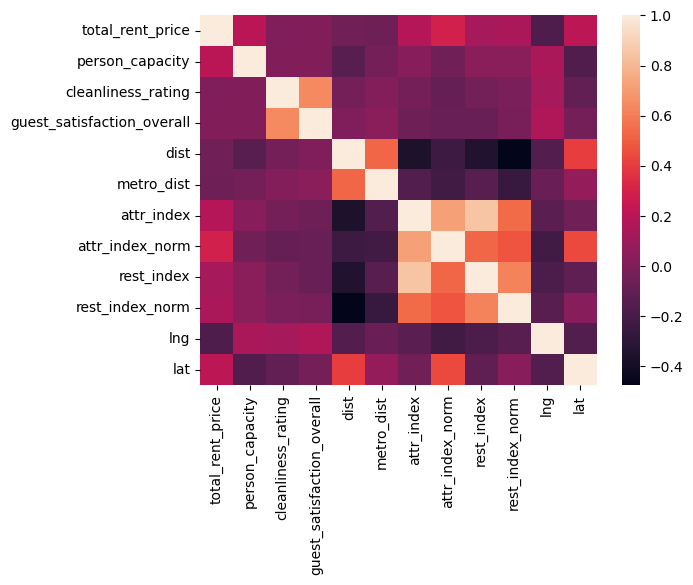

In [10]:
#### Plot Heatmap

# remove columns related to City as well as columns of Objects
columns_to_exclude = df.select_dtypes(include=object).columns.tolist()
for x in df.select_dtypes(include='int64').columns.tolist():  #cities and other True/False features
    columns_to_exclude.append(x)

selected_columns = [col for col in df.columns if col not in columns_to_exclude]
df_selected = df[selected_columns]
sns.heatmap(df_selected.corr())

## 4.4: Examining the pair plot

The pair plot below illustrates the relationships within this Airbnb dataset. Confirming the heatmap's findings, it shows that individual data pairs generally lack a strong correlation with the total rental price.

The most evident linear correlations exist between 'attr_index' and 'attr_index_norm,' as well as 'rest_index' and 'rest_index_norm.' This aligns with expectations since one is a normalization transformation of the other, as discussed earlier.

For other pairs showing some positive or negative correlation with the rental price, their relationships appear nonlinear. Therefore, it's likely that higher-order formulas will be required as I proceed with multilinear regression modellt. 

C:\Users\wilso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wilso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wilso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wilso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

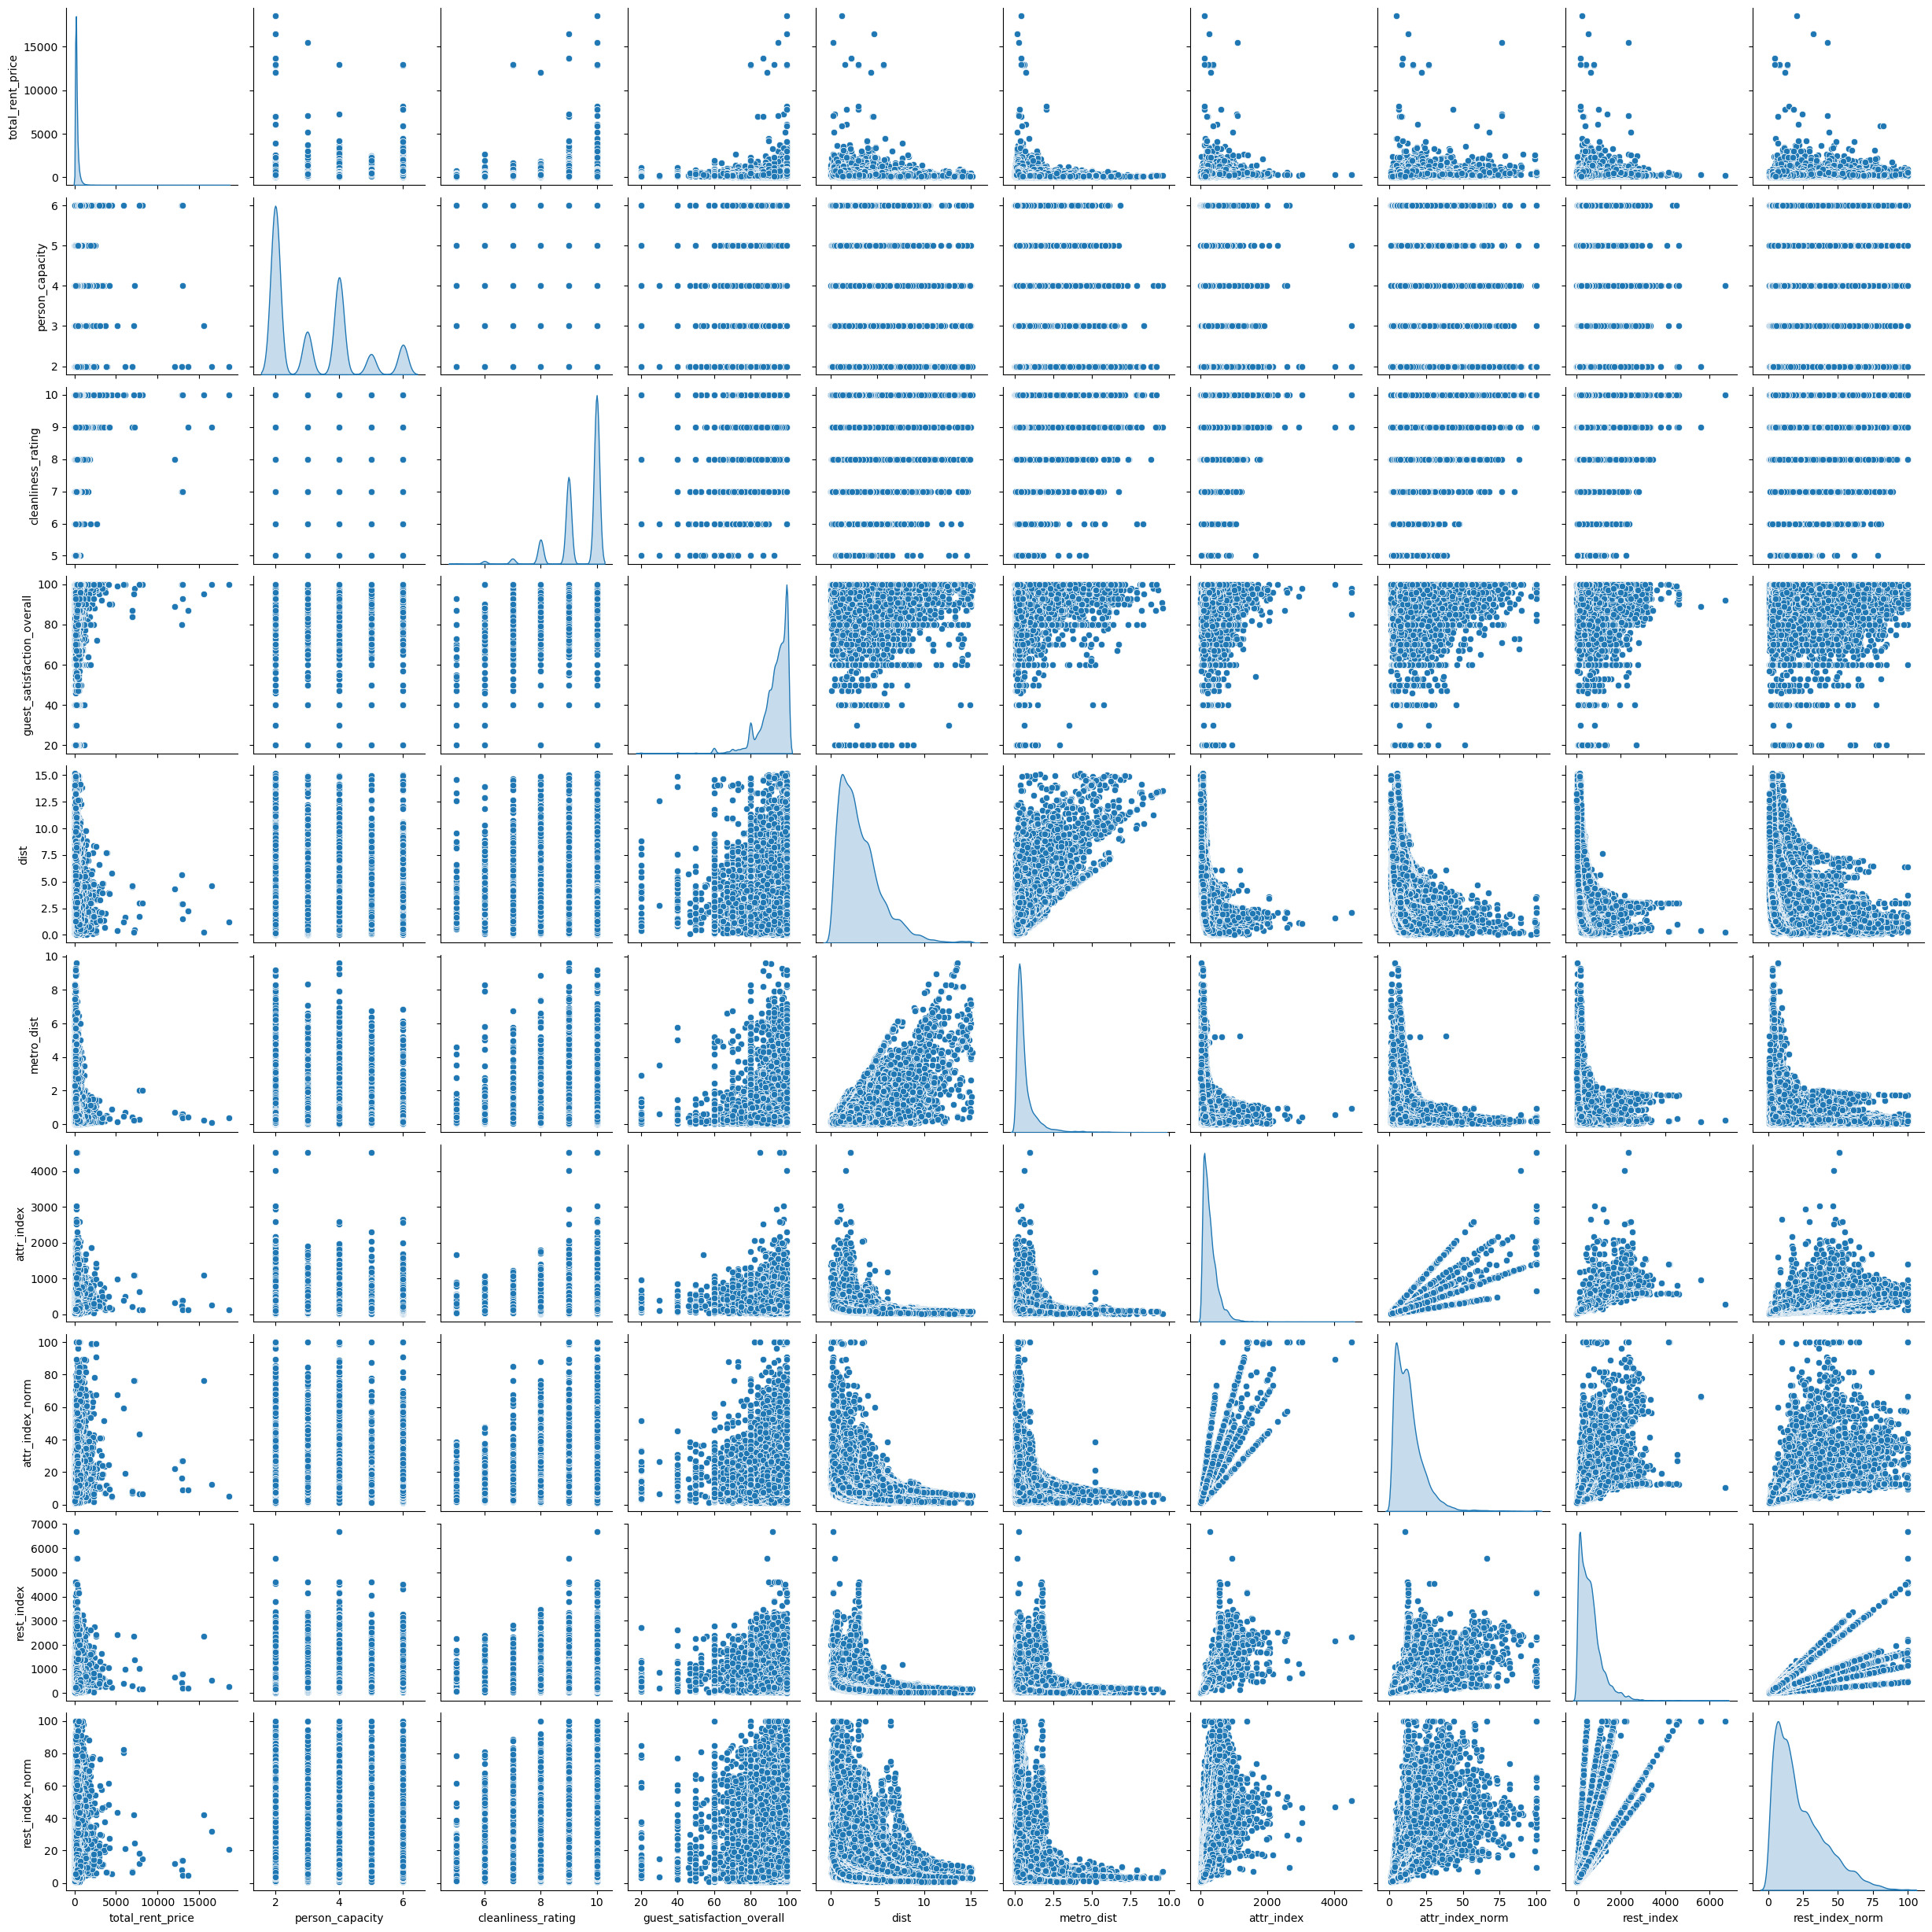

In [11]:
#### Pair Plot

#make Plot with features same as the heapmap above PLUS lng and lat
columns_to_exclude.append('lng')
columns_to_exclude.append('lat')
selected_columns = [col for col in df.columns if col not in columns_to_exclude]
df_selected = df[selected_columns]

sns.pairplot(df_selected,diag_kind='kde') 

## 4.5: Investigating individual features
The followings are explorations with individual features.

### 4.5.1: total_rent_price vs person_capacity
It is evident that the majority of Airbnb rentals are priced under 5000 (for a two-day period). However, there are a few rentals priced over 15,000. These outliers are likely rare, customized homes and should be removed to prevent them from impacting the model's accuracy.

Furthermore, there appears to be a relatively consistent number of rental units priced unde $5000, regardless of their capacity for 2 to 6 people. This is somewhat unexpected, as higher-capacity rentals are generally associated with higher prices. One possible explanation is that the Airbnb dataset exclusively includes rental transactions for two people over a two-day period, as disclosed in the dataset description. 



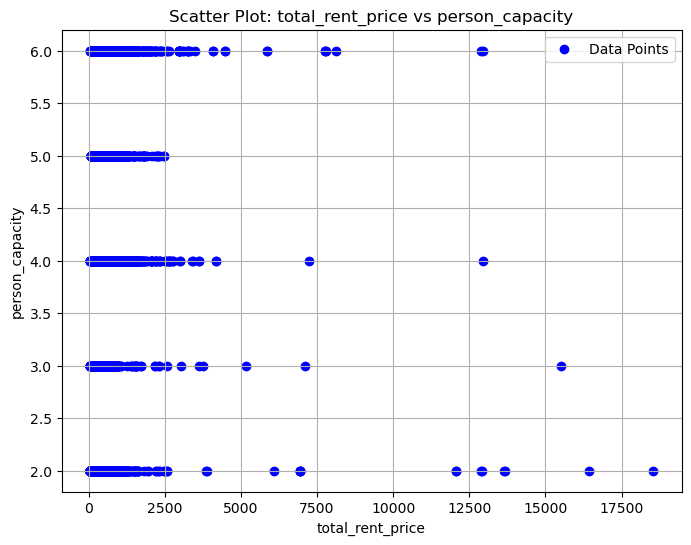

In [12]:
#### Scatter plot
x_feature = 'total_rent_price'
y_feature = 'person_capacity'
x = df[x_feature]
y = df[y_feature]
plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(x, y, color='blue', label='Data Points')  # Scatter plot with blue color
plt.title('Scatter Plot: '+x_feature+' vs '+y_feature)  # Title of the plot
plt.xlabel(x_feature)  # Label for the X-axis
plt.ylabel(y_feature)  # Label for the Y-axis
plt.legend()  # Show legend
plt.grid(True)  # Add grid
plt.show()  # Display the plot

### 4.5.2: total_rent_price vs cleanliness_rating
It's evident that higher cleanliness ratings correspond to higher rental prices, with ratings of 9 and 10 predominantly associated with higher-priced rentals. Many travelers prioritize cleanliness when choosing Airbnb rentals, often preferring accommodations that have been highly rated by previous guests for cleanliness.


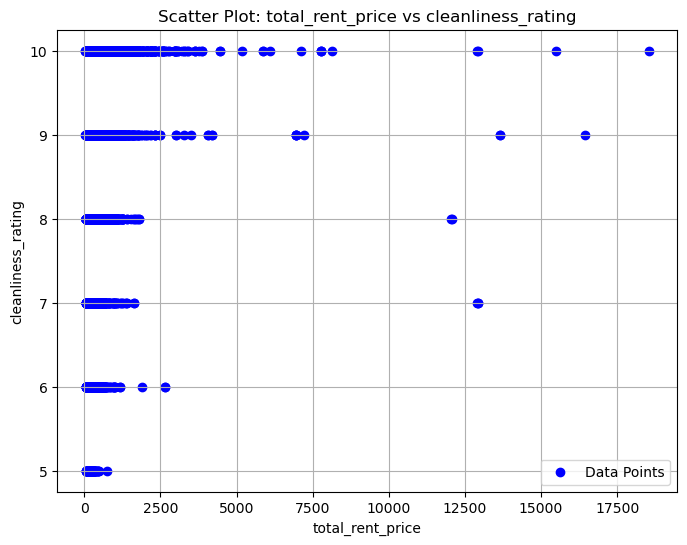

In [13]:
#### Scatter plot
x_feature = 'total_rent_price'
y_feature = 'cleanliness_rating'
x = df[x_feature]
y = df[y_feature]
plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(x, y, color='blue', label='Data Points')  # Scatter plot with blue color
plt.title('Scatter Plot: '+x_feature+' vs '+y_feature)  # Title of the plot
plt.xlabel(x_feature)  # Label for the X-axis
plt.ylabel(y_feature)  # Label for the Y-axis
plt.legend()  # Show legend
plt.grid(True)  # Add grid
plt.show()  # Display the plot

### 4.5.3: total_rent_price vs dist

The farthest rental is approximately 16km away from the city center. This provides valuable insight for Airbnb owners, suggesting that 16km might represent the limit beyond which travelers are less inclined to stay. Additionally, no rental located more than 10km from the city center commands a rental price exceeding $2500.

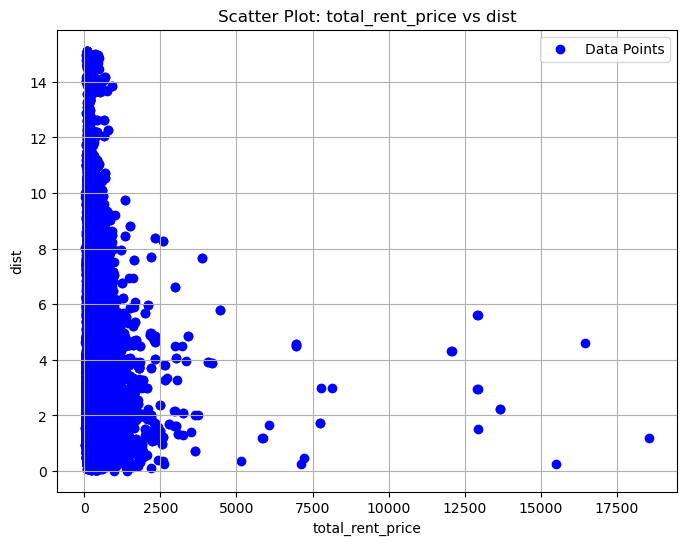

In [15]:
#### Scatter plot
x_feature = 'total_rent_price'
y_feature = 'dist'
x = df[x_feature]
y = df[y_feature]
plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(x, y, color='blue', label='Data Points')  # Scatter plot with blue color
plt.title('Scatter Plot: '+x_feature+' vs '+y_feature)  # Title of the plot
plt.xlabel(x_feature)  # Label for the X-axis
plt.ylabel(y_feature)  # Label for the Y-axis
plt.legend()  # Show legend
plt.grid(True)  # Add grid
plt.show()  # Display the plot

### 4.5.4: attr_index vs attr_index_norm

The scatter plot below confirms a strong linear correlation between the index columns and their normalized counterparts.

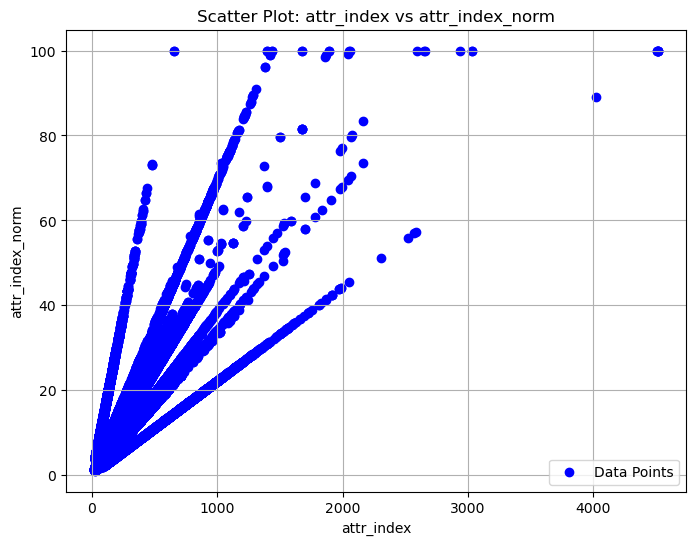

In [16]:
#### Scatter plot
x_feature = 'attr_index'
y_feature = 'attr_index_norm'
x = df[x_feature]
y = df[y_feature]
plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(x, y, color='blue', label='Data Points')  # Scatter plot with blue color
plt.title('Scatter Plot: '+x_feature+' vs '+y_feature)  # Title of the plot
plt.xlabel(x_feature)  # Label for the X-axis
plt.ylabel(y_feature)  # Label for the Y-axis
plt.legend()  # Show legend
plt.grid(True)  # Add grid
plt.show()  # Display the plot

In [17]:
#save datafraome to pickle file
df.to_pickle("airbnbdataframeV2.pkl")

# 5: Models 

This section will discuss model buildling. The goal here is to build a model to predict the total rental price given data in the dataset.  Therefore, Airbnb rental ownwers could use this model to estimate the appropriate listing price for their units.  

Since the target variable total rental price is a continuous variable, I will use modeling techniques that are suitable for quantitative variable. 

The followings are the major steps to develop the model to make prediction on total rental price:
- Removing features or columns that are not compatible or not considered to be relevant
- Spliting data into training set and testing set
- Training the first multiple linear regression model with all the possible features
- Analyzing VIF to check colinearity issue
- Retraining the multiple linear regression model after removing some of the features deemed not suitable
- Training a polynomial regression model with order-term 2
- Training a polynomial regression model with order-term 3
- Training a polynomial regression model with order-term 4
- Comparing the result of different order-term of polynomial model
- Training a random forest model
- Fine tuning the hyperparameters of the Random Forest Regressor model

Did the author use techniques to reduce overfitting or data imbalance? 



In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#retrive dataframe from pickle
df = pd.read_pickle("airbnbdataframeV2.pkl")

## 5.1: Removing features or columns that are not compatible or not considered to be relevant

Columns attr_index and rest_index will be excluded from model building because they are redundant and highly correlated with attr_index_norm and rest_index_norm. Only columns attr_index_norm and rest_index_norm will be used instead.

Columns room_type, city, and week contain text, which is not compatible with regression modeling. Equivalent information from those columns has been added to the data frame during the data cleaning steps.

Location columns including 'Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon', 'London', 'Paris', 'Rome', and 'Vienna' will also be excluded from the model building because they mostly contain boolean val

Column id also won't contribute any value to the model and will be removed. ues.ues.ues.

In [19]:
# Remove features that are highly linearly corelate to each other by examining the pair plot & correlation analysis

# Remove attr_index and rest_index columns as attr_index_norm and rest_index_norm are highly corelated with them
df.drop(columns=['attr_index'],inplace=True)  #drop attr_index
df.drop(columns=['rest_index'],inplace=True)  #drop  rest_index

# Remove columns which has type "object" because their data content has been added to dataframe as additional columns
df.drop(columns=['room_type'],inplace=True)  #drop room_type
df.drop(columns=['city'],inplace=True)  #drop city
df.drop(columns=['week'],inplace=True)  #drop week

#Remove all the columns related to city location because these are mostly just boolean
df.drop(columns=['amsterdam','athens','barcelona','berlin','budapest','lisbon','london','paris','rome','vienna'],inplace=True)

# Remove id column
df.drop(columns=['id'],inplace=True)  #drop id

# Remove weekends column because it has the same the information as weekday with just the opposite direction
df.drop(columns=['weekends'],inplace=True)  #drop id

## 5.2: Spliting data into training set and testing set

The data is separated into training and testing sets with an 80/20 split.

Functions used for analysis and performance evaluation are also defined below. 

In [20]:
# Prepare training and testing data set

#training set is 80% while testing set is 20%
X = df.copy()
y = df['total_rent_price'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# function to perform cross-validation check
def crossValidation(model, X, y):
    # Perform cross-validation with 5 folds
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Use R-squared as the evaluation metric
    # Print the cross-validation scores
    print("Cross-validation scores:", scores)
    # Calculate and print the mean and standard deviation of the scores
    print("Mean R-squared:", scores.mean())
    print("Standard deviation of R-squared:", scores.std())

def VarianceInflationFactor(X_vif):
    # Calculate VIF for each predictor variable
    vif = pd.DataFrame()
    vif["Variable"] = X_vif.columns
    #print(X.columns)
    vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    # Identify variables with high VIF
    high_vif = vif[vif["VIF"] > 10]
    print('#######Variables and their VIF#########')
    print("vif:",vif.sort_values(by="VIF", ascending=False))
    print('high_vif["Variable"]: \n', high_vif["Variable"])
    # Remove variables with high VIF from the model
    #X_reduced = X.drop(columns=high_vif["Variable"])
    #print('X_reduced:',X_reduced)
    return high_vif["Variable"] ## return columns with VIF over 10

## 5.3: Training the first linear regression model with all the possible features

Since the target variable is continuous, linear regression is an appropriate choice for training the data. Initially, all possible features are included in this first model. The formula used to train the model with the training dataset is as follows:

total_rent_price ~ room_shared + room_private + person_capacity + host_is_superhost + multi + biz + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + metro_dist + attr_index_norm + rest_index_norm + lng + lat + Entire_home_apt + weekday

sThe summary of the built model is as follows:
- The model's performance is not satisfactory, with an R-squared value of only 0.214, significantly lower than the expected 0.7 for a good model.
- The Prob (F-statistic) is 0.00, indicating that the null hypothesis of none of the variables being statistically significant can be rejected.
- Most variables have p-values less than 0.05, indicating statistical significance.
- However, the variables 'multi' (indicating whether the listing belongs to hosts with 2-4 offers) and 'weekdays' (indicating whether the rental is rented on weekdays) have p-values over 0.05, suggesting they are not statistically significant. Therefore, they will be excluded from further model building.ildilng.

In [21]:
# Use Multiple Linear Regression to build a model with all features to predict rental price
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Build the formula to create model
firstitem = True
formula = 'total_rent_price ~ '  #build formula for linear regression modeling
for p in X_train.columns:
    if p != 'total_rent_price':
        formula = formula + p + ' + '
if formula.endswith(' + '):      # Remove the last character using slicing
    formula = formula[:-3]
print(formula)

#train the model with training set data
model = smf.ols(formula=formula, data=X_train).fit()
print(model.summary())

#Model performance with the testing set data
preds = model.predict(X_test)
print('r2 score:', r2_score(y_test, preds))

total_rent_price ~ room_shared + room_private + person_capacity + host_is_superhost + multi + biz + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + metro_dist + attr_index_norm + rest_index_norm + lng + lat + Entire_home_apt + weekdays
                            OLS Regression Results                            
Dep. Variable:       total_rent_price   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.6
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:58:01   Log-Likelihood:            -2.9121e+05
No. Observations:               41027   AIC:                         5.825e+05
Df Residuals:                   41010   BIC:                         5.826e+05
Df Model:                          16                                         
Covariance Type:            nonro

## 5.4: Analyzing VIF to check colinearity issue

The following code checks the Variance Inflation Factor among the variables to see if colinearity exists among the different variables in the data. 

The analysis shows that two of features 'Entire_home_apt' and 'room_private' have exceptionally high Variance Inflation Factor of 220 and 125 respectively.  VIF over 10 seems to cause issue, so these two features will be removed. 


In [22]:
# Analyse VIF of the variables to check colinearility issues
df_column_with_high_VIF = VarianceInflationFactor(X_train)

# Analyse P-value of the variables from the trained model 
d = {}
for i in X_train.columns.tolist():
    if i != 'total_rent_price':
        d[f'{i}'] = round(model.pvalues[i],4)
df_pvalue= pd.DataFrame(d.items(), columns=['Var_name', 'p-Value']).sort_values(by = 'p-Value',ascending=False).reset_index(drop=True)
print("#######Variables and its p-value########## \n")
print(df_pvalue)

#######Variables and their VIF#########
vif:                       Variable         VIF
16             Entire_home_apt  220.005566
2                 room_private  124.930949
1                  room_shared    3.495404
10                        dist    2.553297
15                         lat    2.069445
3              person_capacity    2.040613
12             attr_index_norm    2.032565
8   guest_satisfaction_overall    1.833943
7           cleanliness_rating    1.755858
13             rest_index_norm    1.639143
9                     bedrooms    1.591739
6                          biz    1.486099
11                  metro_dist    1.426882
5                        multi    1.354873
14                         lng    1.273121
0             total_rent_price    1.272156
4            host_is_superhost    1.156649
17                    weekdays    1.004857
high_vif["Variable"]: 
 2        room_private
16    Entire_home_apt
Name: Variable, dtype: object
#######Variables and its p-value########

## 5.5: Retraining the multiple linear regression model after removing some of the features deemed not suitable

After removing the features with high VIF and p-values, I trained another multiple linear regression model using the remaining features with the training set data. The summary of the newly built model is shown below.

However, this new model performed even worse than the previous one, with an R-squared value of 0.196. This suggests that the relationship between the data may not be linearly correlated. Consequently, I plan to use polynomial regression to train the model with higher-order terms.

Additionally, I am capturing the performance of the model on the testing dataset and storing them for comparison with other versions I am building later. The performance metrics I am capturing include Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R2 Score.

In [23]:
#save datafraome to pickle file
df.to_pickle("airbnbdataframeV3.pkl")

#### Remove features that is not suitable for training the model

# declare a dataframe to store the performance of different models built in the analsis below
model_performance = pd.DataFrame(columns=['Model','Modelobj','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R2 Score'])

# Find feature variables which have p-value > 0.05
column_to_remove = df_pvalue[df_pvalue['p-Value'] > 0.05]['Var_name'].values
X_train.drop(columns=column_to_remove, inplace=True)
X_test.drop(columns=column_to_remove, inplace=True)

# Find and remove the features with VIF over 10
coltoremove = VarianceInflationFactor(X_train)
X_train.drop(columns=coltoremove, inplace=True)
X_test.drop(columns=coltoremove, inplace=True)

# Train multiple linear regression model again
firstitem = True
formula = 'total_rent_price ~ '  #build formula for linear regression modeling
for p in X_train.columns:
    if p != 'total_rent_price':
        formula = formula + p + ' + '
if formula.endswith(' + '):      # Remove the last character using slicing
    formula = formula[:-3]
print(formula)

model = smf.ols(formula=formula, data=X_train).fit()
print(model.summary())

#Model performance evaluation for testing dataset
preds = model.predict(X_test)
modelname = "Order of One"
print('X_test shape:',X_test.shape)
print('X_test type:',type(X_test))
print('y_test shape:',y_test.shape)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)
print('r2:',r2)

# set the row and insert to performance tracking dataframe
newModelPerform = pd.DataFrame({'Model': [modelname], 'Modelobj': [model], 'Mean Absolute Error': [mae], 'Mean Squared Error': [mse], \
                                'Root Mean Squared Error': [rmse], 'R2 Score': [r2]})
model_performance = pd.concat([model_performance, newModelPerform ], ignore_index=True)


#######Variables and their VIF#########
vif:                       Variable         VIF
15             Entire_home_apt  214.052898
2                 room_private  120.503156
1                  room_shared    3.416644
9                         dist    2.552919
14                         lat    2.045184
3              person_capacity    2.029225
11             attr_index_norm    2.025395
7   guest_satisfaction_overall    1.826155
6           cleanliness_rating    1.755620
12             rest_index_norm    1.634200
8                     bedrooms    1.588747
10                  metro_dist    1.426799
13                         lng    1.272262
0             total_rent_price    1.272048
4            host_is_superhost    1.152217
5                          biz    1.138560
high_vif["Variable"]: 
 2        room_private
15    Entire_home_apt
Name: Variable, dtype: object
total_rent_price ~ room_shared + person_capacity + host_is_superhost + biz + cleanliness_rating + guest_satisfaction_overall +

C:\Users\wilso\AppData\Local\Temp\ipykernel_30652\4165233543.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance = pd.concat([model_performance, newModelPerform ], ignore_index=True)


## 5.6: Training a polynomial regression model with order-term 2

To train a polynomial regression model with a second-order term, I adjusted the formula by including a squared term for each remaining feature from the previous training. The new formula is as follows:

total_rent_price ~ room_shared + person_capacity + host_is_superhost + biz + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + metro_dist + attr_index_norm + rest_index_norm + lng + lat +  + np.power(room_shared, 2) +  + np.power(person_capacity, 2) +  + np.power(host_is_superhost, 2) +  + np.power(biz, 2) +  + np.power(cleanliness_rating, 2) +  + np.power(guest_satisfaction_overall, 2) +  + np.power(bedrooms, 2) +  + np.power(dist, 2) +  + np.power(metro_dist, 2) +  + np.power(attr_index_norm, 2) +  + np.power(rest_index_norm, 2) +  + np.power(lng, 2) +  + np.power(lat, 2)

After fittinthis polynomial regressionhe model, the summary reveals that the Adj. R-squared value slightly improves to 0.209. However, this improvement is still insufficient for the model to be deemed reasonable. It's possible that the model requires an even higher-order term to better capture the data.

For the next model trainingplantend to increase the order term to 3.

In [24]:
######  Train polynomial regression model with order-term 2 

# Find features with highest Adjusted R-squared value 
model_result = pd.DataFrame(columns=['Number of Order','Adjusted R-squared'])

## Increase the order to 2 in the formula to train
print('Increase the order to 2 in the formula to train')
firstitem = True
formula = 'total_rent_price ~ '  #build formula for linear regression modeling
for p in X_train.columns:
    if p != 'total_rent_price':
        formula = formula + p + ' + '
for p in X_train.columns:
    if p != 'total_rent_price':
        formula = formula + ' + np.power(' + p + ', 2)' + ' + '
if formula.endswith(' + '):      # Remove the last character using slicing
    formula = formula[:-3]

print(formula)
model = smf.ols(formula=formula, data=X_train).fit()
print(model.summary())

newrow = pd.DataFrame({'Number of Order': [2], 'Adjusted R-squared': [model.rsquared_adj]})
model_result = pd.concat([model_result, newrow ], ignore_index=True)

#Model performance evaluation for testing dataset
preds = model.predict(X_test)
modelname = "Order of Two"
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)
print('r2:',r2)

# set the row and insert to performance tracking dataframe
newModelPerform = pd.DataFrame({'Model': [modelname], 'Modelobj': [model], 'Mean Absolute Error': [mae], 'Mean Squared Error': [mse], \
                                'Root Mean Squared Error': [rmse], 'R2 Score': [r2]})
model_performance = pd.concat([model_performance, newModelPerform ], ignore_index=True)


Increase the order to 2 in the formula to train
total_rent_price ~ room_shared + person_capacity + host_is_superhost + biz + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + metro_dist + attr_index_norm + rest_index_norm + lng + lat +  + np.power(room_shared, 2) +  + np.power(person_capacity, 2) +  + np.power(host_is_superhost, 2) +  + np.power(biz, 2) +  + np.power(cleanliness_rating, 2) +  + np.power(guest_satisfaction_overall, 2) +  + np.power(bedrooms, 2) +  + np.power(dist, 2) +  + np.power(metro_dist, 2) +  + np.power(attr_index_norm, 2) +  + np.power(rest_index_norm, 2) +  + np.power(lng, 2) +  + np.power(lat, 2)
                            OLS Regression Results                            
Dep. Variable:       total_rent_price   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     472.5
Date:                Tue, 05 Mar 2024

C:\Users\wilso\AppData\Local\Temp\ipykernel_30652\1226517638.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_result = pd.concat([model_result, newrow ], ignore_index=True)


## 5.7: Training a polynomial regression model with order-term 3

To train a polynomial regression model with an order-term of 3, I adjusted the formula by adding a cubic term for each feature from the previous training. The new formula is as follows:

total_rent_price ~ id + room_shared + room_private + person_capacity + host_is_superhost + biz + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + metro_dist + attr_index_norm + rest_index_norm + lng + lat + Entire_home_apt + Private_room + Shared_room + weekdays + weekends +  + np.power(id, 2) + np.power(id, 3) +  + np.power(room_shared, 2) + np.power(room_shared, 3) +  + np.power(room_private, 2) + np.power(room_private, 3) +  + np.power(person_capacity, 2) + np.power(person_capacity, 3) +  + np.power(host_is_superhost, 2) + np.power(host_is_superhost, 3) +  + np.power(biz, 2) + np.power(biz, 3) +  + np.power(cleanliness_rating, 2) + np.power(cleanliness_rating, 3) +  + np.power(guest_satisfaction_overall, 2) + np.power(guest_satisfaction_overall, 3) +  + np.power(bedrooms, 2) + np.power(bedrooms, 3) +  + np.power(dist, 2) + np.power(dist, 3) +  + np.power(metro_dist, 2) + np.power(metro_dist, 3) +  + np.power(attr_index_norm, 2) + np.power(attr_index_norm, 3) +  + np.power(rest_index_norm, 2) + np.power(rest_index_norm, 3) +  + np.power(lng, 2) + np.power(lng, 3) +  + np.power(lat, 2) + np.power(lat, 3) +  + np.power(Entire_home_apt, 2) + np.power(Entire_home_apt, 3) +  + np.power(Private_room, 2) + np.power(Private_room, 3) +  + np.power(Shared_room, 2) + np.power(Shared_room, 3) +  + np.power(weekdays, 2) + np.power(weekdays, 3) +  + np.power(weekends, 2) + np.power(weekends, 3)

This cubic polynomial regression model shows a greater improvement compared to the quadratic polynomial regression. The adjusted R-squared value has now increased to 0.230, although it still falls short of being an effective model.

For the next model training, I plan to increase the polynomial order to 4 to see if the model will show significant improvement.

In [25]:
######  Train polynomial regression model with order-term 3
print('Increase the order to 3 in the formula to train')

## Increase the order to 3 in the formula to train
firstitem = True
formula = 'total_rent_price ~ '  #build formula for linear regression modeling
for p in X_train.columns:
    if p != 'total_rent_price':
        formula = formula + p + ' + '
for p in X_train.columns:
    if p != 'total_rent_price':
        formula = formula + ' + np.power(' + p + ', 2)' + ' + np.power(' + p + ', 3)' + ' + '
if formula.endswith(' + '):      # Remove the last character using slicing
    formula = formula[:-3]

print(formula)
model = smf.ols(formula=formula, data=X_train).fit()
print(model.summary())

# Aggregate result for model with different order terms
newrow = pd.DataFrame({'Number of Order': [3], 'Adjusted R-squared': [model.rsquared_adj]})
model_result = pd.concat([model_result, newrow ], ignore_index=True)

#Model performance evaluation for testing dataset
preds = model.predict(X_test)
modelname = "Order of Three"
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)
print('r2:',r2)

# set the row and insert to performance tracking dataframe
newModelPerform = pd.DataFrame({'Model': [modelname], 'Modelobj': [model], 'Mean Absolute Error': [mae], 'Mean Squared Error': [mse], \
                                'Root Mean Squared Error': [rmse], 'R2 Score': [r2]})
model_performance = pd.concat([model_performance, newModelPerform ], ignore_index=True)

Increase the order to 3 in the formula to train
total_rent_price ~ room_shared + person_capacity + host_is_superhost + biz + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + metro_dist + attr_index_norm + rest_index_norm + lng + lat +  + np.power(room_shared, 2) + np.power(room_shared, 3) +  + np.power(person_capacity, 2) + np.power(person_capacity, 3) +  + np.power(host_is_superhost, 2) + np.power(host_is_superhost, 3) +  + np.power(biz, 2) + np.power(biz, 3) +  + np.power(cleanliness_rating, 2) + np.power(cleanliness_rating, 3) +  + np.power(guest_satisfaction_overall, 2) + np.power(guest_satisfaction_overall, 3) +  + np.power(bedrooms, 2) + np.power(bedrooms, 3) +  + np.power(dist, 2) + np.power(dist, 3) +  + np.power(metro_dist, 2) + np.power(metro_dist, 3) +  + np.power(attr_index_norm, 2) + np.power(attr_index_norm, 3) +  + np.power(rest_index_norm, 2) + np.power(rest_index_norm, 3) +  + np.power(lng, 2) + np.power(lng, 3) +  + np.power(lat, 2) + np.power(lat, 

## 5.8: Training a polynomial regression model with order-term 4

The polynomial has been expanded to include quartic terms. The quartic terms for every feature are added to the formula as follows.

total_rent_price ~ room_shared + person_capacity + host_is_superhost + biz + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + metro_dist + attr_index_norm + rest_index_norm + lng + lat +  + np.power(room_shared, 2) + np.power(room_shared, 3) + np.power(room_shared, 4) +  + np.power(person_capacity, 2) + np.power(person_capacity, 3) + np.power(person_capacity, 4) +  + np.power(host_is_superhost, 2) + np.power(host_is_superhost, 3) + np.power(host_is_superhost, 4) +  + np.power(biz, 2) + np.power(biz, 3) + np.power(biz, 4) +  + np.power(cleanliness_rating, 2) + np.power(cleanliness_rating, 3) + np.power(cleanliness_rating, 4) +  + np.power(guest_satisfaction_overall, 2) + np.power(guest_satisfaction_overall, 3) + np.power(guest_satisfaction_overall, 4) +  + np.power(bedrooms, 2) + np.power(bedrooms, 3) + np.power(bedrooms, 4) +  + np.power(dist, 2) + np.power(dist, 3) + np.power(dist, 4) +  + np.power(metro_dist, 2) + np.power(metro_dist, 3) + np.power(metro_dist, 4) +  + np.power(attr_index_norm, 2) + np.power(attr_index_norm, 3) + np.power(attr_index_norm, 4) +  + np.power(rest_index_norm, 2) + np.power(rest_index_norm, 3) + np.power(rest_index_norm, 4) +  + np.power(lng, 2) + np.power(lng, 3) + np.power(lng, 4) +  + np.power(lat, 2) + np.power(lat, 3) + np.power(lat, 4)

The model summary is shown below, and the adjusted R-squared value has actually dropped to 0.236 from the previous cubic model.




In [26]:
######  Train polynomial regression model with order-term 4

## Increase the order to 4 in the formula to train
print('Increase the order to 4 in the formula to train')
firstitem = True
formula = 'total_rent_price ~ '  #build formula for linear regression modeling
for p in X_train.columns:
    if p != 'total_rent_price':
        formula = formula + p + ' + '
for p in X_train.columns:
    if p != 'total_rent_price':
        formula = formula + ' + np.power(' + p + ', 2)' + ' + np.power(' + p + ', 3)' + ' + np.power(' + p + ', 4)' + ' + '
if formula.endswith(' + '):      # Remove the last character using slicing
    formula = formula[:-3]

print(formula)
model = smf.ols(formula=formula, data=X_train).fit()
print(model.summary())

# Aggregate result for model with different order terms
newrow = pd.DataFrame({'Number of Order': [4], 'Adjusted R-squared': [model.rsquared_adj]})
model_result = pd.concat([model_result, newrow ], ignore_index=True)

#Model performance evaluation for testing dataset
preds = model.predict(X_test)
modelname = "Order of Four"
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)
print('r2:',r2)

# set the row and insert to performance tracking dataframe
newModelPerform = pd.DataFrame({'Model': [modelname], 'Modelobj': [model], 'Mean Absolute Error': [mae], 'Mean Squared Error': [mse], \
                                'Root Mean Squared Error': [rmse], 'R2 Score': [r2]})
model_performance = pd.concat([model_performance, newModelPerform ], ignore_index=True)

Increase the order to 4 in the formula to train
total_rent_price ~ room_shared + person_capacity + host_is_superhost + biz + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + metro_dist + attr_index_norm + rest_index_norm + lng + lat +  + np.power(room_shared, 2) + np.power(room_shared, 3) + np.power(room_shared, 4) +  + np.power(person_capacity, 2) + np.power(person_capacity, 3) + np.power(person_capacity, 4) +  + np.power(host_is_superhost, 2) + np.power(host_is_superhost, 3) + np.power(host_is_superhost, 4) +  + np.power(biz, 2) + np.power(biz, 3) + np.power(biz, 4) +  + np.power(cleanliness_rating, 2) + np.power(cleanliness_rating, 3) + np.power(cleanliness_rating, 4) +  + np.power(guest_satisfaction_overall, 2) + np.power(guest_satisfaction_overall, 3) + np.power(guest_satisfaction_overall, 4) +  + np.power(bedrooms, 2) + np.power(bedrooms, 3) + np.power(bedrooms, 4) +  + np.power(dist, 2) + np.power(dist, 3) + np.power(dist, 4) +  + np.power(metro_dist, 2) + np.

## 5.9: Comparing the result of different order-term of polynomial model

The chart below shows the Adjusted R-squared value for polynomial regression model of order-term 2, 3 and 4 trained earlier. Adjusted R-square improves relatively large from good improvement jumping from quadratic to cubic, but the improvement slows down from cubic to quartic.

It seems that improvement will be very limited even if even higher term-order is used to train the polynomial regression model. 

I plan to explore other machine learning such as random forest to see whether I can get better result.  

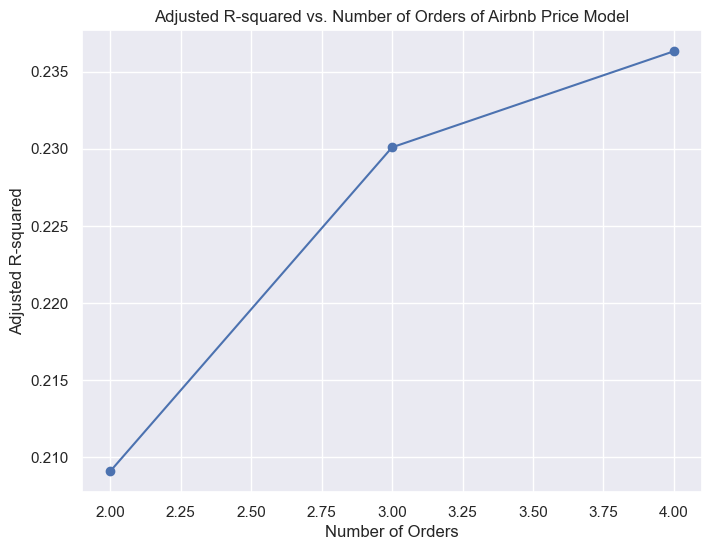

In [27]:
# Aggregate result for model with different order terms tried above

plt.figure(figsize=(8, 6))
plt.plot(model_result['Number of Order'], model_result['Adjusted R-squared'], marker='o', linestyle='-')
plt.title('Adjusted R-squared vs. Number of Orders of Airbnb Price Model')
plt.xlabel('Number of Orders')
plt.ylabel('Adjusted R-squared')
plt.grid(True)
plt.show()


## 5.10: Training a random forest model

I am training the dataset using Random Forest Regressor(RFR) because the target variable is continuous, making Random Forest Classifier unsuitable for this task. 

I use the following hyperparameters for my initial attempt:
- n_estimators = 100  
- max_depth = 50  
- min_samples_leaf = 20  
- max_features = 5

I used cross-validation to evaluate the model using the training dataset. I opted for 5-fold cross-validation, dividing the training set into 5 segments for testing. The results of the Random Forest Regressor model are displayed below:

Cross-validation scores: 0.72106424, 0.73577775, 0.87520772, 0.7896216, and 0.77189969
Mean R-squared: 0.778714201049391
Standard deviation of R-squared: 0.054117399006495814

The performance of the Random Forest Regressor model significantly outperforms the polynomial regression model. The RFR model achieves a mean R-squared value of 0.7787 across the 5-fold cross-validation results.14

In [28]:
#### Use Random Forest Regressor to build a model to predict rental price
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import math

n_estimators = 100  # good 200
max_depth = 50  #good 10
min_samples_leaf = 20  #good 2
max_features = 5  #good 10

model = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features, random_state=42)
model.fit(X_train, y_train)

# Run Cross Validation result:
crossValidation(model, X_train, y_train)

#Model performance evaluation for testing dataset
preds = model.predict(X_test)
modelname = "Random Forest Regressor V1"
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)
print('model: ',modelname)
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)
print('r2:',r2)

# set the row and insert to performance tracking dataframe
newModelPerform = pd.DataFrame({'Model': [modelname], 'Modelobj': [model], 'Mean Absolute Error': [mae], 'Mean Squared Error': [mse], \
                                'Root Mean Squared Error': [rmse], 'R2 Score': [r2]})
model_performance = pd.concat([model_performance, newModelPerform ], ignore_index=True)

Cross-validation scores: [0.72106424 0.73577775 0.87520772 0.7896216  0.77189969]
Mean R-squared: 0.778714201049391
Standard deviation of R-squared: 0.054117399006495814
model:  Random Forest Regressor V1
mae: 10.286163420302836
mse: 16708.258574645664
rmse: 129.2604292683792
r2: 0.8379760157780622


## 5.10: Fine tuning the hyperparameters of the Random Forest Regressor model

I have the capability to explore the hyperparameters of the RFR model and enhance its performance. The adjustments to the hyperparameters include:
- increasing n_estimators to 300 to have more "trees" working together
- decreasing max_depth to 5 to keep each "tree" simple to avoid overfitting
- decreasing min_samples_leaf to 2 to keep "tree" small
- increasing max_features to 8 to allow more features to be selected for model training

The result of the fine tuned RFR model seems to be much better.  Mean R-squared from 5-fold testing is 0.944.  

Cross-validation scores: 0.90417638, 0.91500326, 0.95241959, 0.97590782, 0.97429887
Mean R-squared: 0.9799950105290913
Standard deviation of R-squared: 0.019975762622999216

In [29]:
#### Fine tuning the hyperparameters of the Random Forest Regressor model

n_estimators = 300
max_depth = 5
min_samples_leaf = 2
max_features = 8 

model = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features, random_state=42)
model.fit(X_train, y_train)

# Run Cross Validation result:
crossValidation(model, X_train, y_train)

#Model performance evaluation for testing dataset
preds = model.predict(X_test)
modelname = "Random Forest Regressor V2"
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)
print('model: ',modelname)
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)
print('r2:',r2)

# set the row and insert to performance tracking dataframe
newModelPerform = pd.DataFrame({'Model': [modelname], 'Modelobj': [model], 'Mean Absolute Error': [mae], 'Mean Squared Error': [mse], \
                                'Root Mean Squared Error': [rmse], 'R2 Score': [r2]})
model_performance = pd.concat([model_performance, newModelPerform ], ignore_index=True)

Cross-validation scores: [0.90417638 0.91500326 0.95241959 0.97590782 0.97429887]
Mean R-squared: 0.944361185763302
Standard deviation of R-squared: 0.029776161713476443
model:  Random Forest Regressor V2
mae: 24.73845085023092
mse: 2878.8686915212816
rmse: 53.655090080264344
r2: 0.9720829209478543


# 6: Results and Analysis 

**Basic Result Summary:** After training several ploynomial regression models and random forest regressor models.  I have trained I have evaluated these models with the testing datasets.  



## 6.1: Model performance comparsion with testing dataset

The diagrams in the cell below show the performance of the different models based on their Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R2 Score.  The six models that have been trained in this project include a multiple linear regression, a quadratic regression, a cubic regression, a quartic regression and two random forest regressor models with different hyperparameters. 

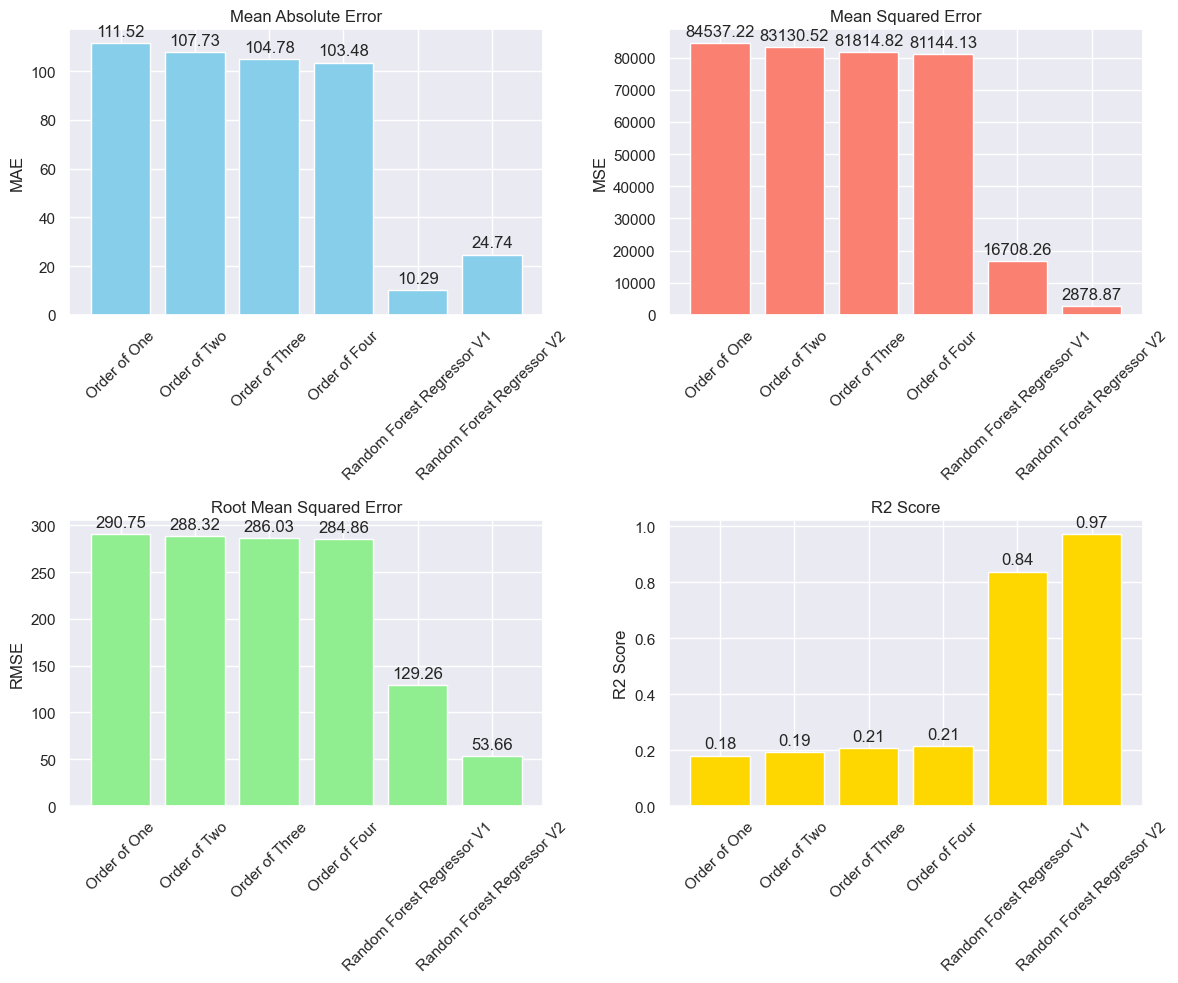

In [30]:
# plot diagram to compare the performance of trained model

import matplotlib.pyplot as plt

# Data
models = model_performance['Model']
mae = model_performance['Mean Absolute Error']
mse = model_performance['Mean Squared Error']
rmse = model_performance['Root Mean Squared Error']
r2_score = model_performance['R2 Score']

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Mean Absolute Error
bars = axes[0, 0].bar(models, mae, color='skyblue')
axes[0, 0].set_title('Mean Absolute Error')
axes[0, 0].set_ylabel('MAE')
for bar in bars:
    height = bar.get_height()
    axes[0, 0].annotate('{}'.format(round(height, 2)),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

# Mean Squared Error
bars = axes[0, 1].bar(models, mse, color='salmon')
axes[0, 1].set_title('Mean Squared Error')
axes[0, 1].set_ylabel('MSE')
for bar in bars:
    height = bar.get_height()
    axes[0, 1].annotate('{}'.format(round(height, 2)),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

# Root Mean Squared Error
bars = axes[1, 0].bar(models, rmse, color='lightgreen')
axes[1, 0].set_title('Root Mean Squared Error')
axes[1, 0].set_ylabel('RMSE')
for bar in bars:
    height = bar.get_height()
    axes[1, 0].annotate('{}'.format(round(height, 2)),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

# R2 Score
bars = axes[1, 1].bar(models, r2_score, color='gold')
axes[1, 1].set_title('R2 Score')
axes[1, 1].set_ylabel('R2 Score')
for bar in bars:
    height = bar.get_height()
    axes[1, 1].annotate('{}'.format(round(height, 2)),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

# Rotate x-axis labels for better readability
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6.2: Discussing the model performance

Based on the performance results on the testing dataset, it's evident that the Random Forest Regressor (RFR) outperforms the Multiple Linear Regression (MLR) significantly. The R2 scores for various MLRs range from 0.18 to 0.21, while even the basic version of RFR (version 1) achieves a minimum R2 score of 0.84 with straightforward hyperparameters.

Upon fine-tuning the hyperparameters, the optimized RFR version 2 achieves an impressive R2 score of 0.97 on the testing dataset.

The best-performing RFR model, identified with hyperparameters n_estimators = 300, max_depth = 5, min_samples_leaf = 2, and max_features = 8, stands out as the optimal choice for this problem. 


# 7: Discussion and Conclusion

Here are the key learnings and takeaways from this project:
- **Manual feature engineering can be time-consuming and may not always yield consistent results**. Despite attempting multiple linear regression, the model's performance was subpar. Identifying relevant features that significantly contribute to a machine learning model's effectiveness requires thorough examination, and experimenting with polynomial terms can be a trial-and-error process. However, there's no guarantee of improved results.
- **It's crucial to check for collinearity issues in the dataset using methods like VIF (Variance Inflation Factor)**. In this project, I didn't initially detect collinearity until observing a note in the model summary suggesting its presence. Subsequent investigation revealed the presence of multiple columns with identical values, highlighting the importance of such checks.

Why things aren't working out:
- **Initially, I wasn't aware of any issues with collinearity in my data.** However, upon training my initial multiple linear regression model, the model summary indicated a potential collinearity problem. When attempting to check the Variance Inflation Factor (VIF), I encountered an error stating that there were duplicated features in my dataset. Upon closer inspection, I discovered that I had two columns with identical values: 'room_private' and 'Private_room'. This duplication arose because I created the 'Private_room' column from the original 'Room_type' column, which contained categorical variables. When converting these categorical variables into new columns, 'Private_room' was one of the resulting columns. I wasn't aware that the original dataset already included a similar column, 'room_private', which represented the same data as 'Private_room'. After removing the 'Private_room' column, I was able to successfully run the VIF analysis. 
- **Despite my efforts to manually find the formula for polynomial regression, I didn't achieve the desired results.** I experimented with different order terms, but the Adjusted R-squared score for my polynomial regression model remained around the 0.2 level. It seems that I'll need to explore numerous combinations of feature terms to make significant improvements to the polynomial regression model.. 

Here are some improvements I would make if I had more time to work on this project:
- **Refactoring the code:** I would refactor the code to create reusable functions. Currently, there is redundancy in gathering model results and performance metrics, which could be avoided by implementing these tasks as functions or using the performance evaluation module from sklearn. By organizing the code better, it would be easier to maintain and understand. 
- **Implementing GridSearchCV**: Instead of manually searching for hyperparameters for each model, I would use GridSearchCV to automate this process. GridSearchCV allows for systematic exploration of a range of hyperparameters to find the best combination. This would lead to more efficient and potentially better-performing models. 


This project is published on my github account - https://github.com/wlau0721/CUB-DTSA5509-SupervisedML-FinalProject 